### Randomly sample MAX_SAMPLE_SIZE CFGs whose size < MAX_GRAPH_SIZE

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import glob
import os
import random
import pickle as pkl
import numpy as np
import scipy as sp
import pandas as pd
from networkx import number_of_nodes, adjacency_matrix
from node_attributes import node_features


class_dirnames = glob.glob('*')
small_graph_filenames = []
total = 0
MAX_SAMPLE_SIZE = 140
MAX_GRAPH_SIZE = 480
output_dir = 'Small%dACFGs/' % MAX_GRAPH_SIZE
CFG_labels = ['Benign', 'Bagle', 'Bifrose']
qualified = {'Benign': 0, 'Bagle': 0, 'Bifrose': 0}
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("Create new dir %s" % output_dir)
else:
    print("%s already exists" % output_dir)

Small480ACFGs/ already exists


In [2]:
"""Path name format: class/graph_id/pkl_name"""
for class_dirname in class_dirnames:
    if class_dirname not in CFG_labels:
        continue
    
    print("Processing %s CFGs" % class_dirname)
    data_dirnames = glob.glob(class_dirname + '/*')
    random.shuffle(data_dirnames)

    cnt = MAX_SAMPLE_SIZE
    for data_dirname in data_dirnames:
        pkl_filenames = glob.glob(data_dirname + '/*')
        if len(pkl_filenames) == 0:
            print('[Warning] %s is empty' % data_dirname)
        else:  # Assume only 1 file under data dir
            total += 1
            G = pkl.load(open(pkl_filenames[0], 'rb'))
            if number_of_nodes(G) < MAX_GRAPH_SIZE:
                label = class_dirname
                graph_id = pkl_filenames[0].split('/')[1]
                qualified[label] += 1

                if cnt > 0:  # Not exceed sample size
                    cnt -= 1
                    small_graph_filenames.append(pkl_filenames[0])
                    features = node_features(G)
                    np.savetxt(output_dir + graph_id + '.features.txt', features, fmt="%d")
                    np.savetxt(output_dir + graph_id + '.label.txt', np.array([label]), fmt="%s")
                    np.savetxt(output_dir + graph_id + '.adjacent.txt', adjacency_matrix(G).todense(), fmt="%d")
                    sp.sparse.save_npz(output_dir + graph_id + '.adjacent', adjacency_matrix(G))


np.savetxt(output_dir + 'small_graph_filenames.csv', small_graph_filenames, fmt="%s")
small_cnt = len(small_graph_filenames)
print("%d / %d = %.4f" % (small_cnt, total, small_cnt / total))
print("10 random files processed")
print([small_graph_filenames[x] for x in np.random.randint(0, small_cnt, size=10)])
print("Qualified: ", qualified)

Processing Bagle CFGs
Processing Bifrose CFGs
[Warning] Bifrose/68577f95d878fb0d3cb1ccb311bcd375 is empty
Processing Benign CFGs
[Warning] Benign/ef11db385af16b633efbd524907baa58 is empty
411 / 1689 = 0.2433
10 random files processed
['Bagle/e1e4da10fc6a6287604d896964131034/Email-Worm.Win32.Bagle.hs.gpickle', 'Benign/4658a71c68295204e177e55c4f454de4/4658a71c68295204e177e55c4f454de4.gpickle', 'Benign/85c132975b756dac894b97fb3aecbebf/85c132975b756dac894b97fb3aecbebf.gpickle', 'Bifrose/3d9ae0f753cb8b3153b1ddae439a92bf/Backdoor.Win32.Bifrose.ajtz.gpickle', 'Benign/de004b198f976e815714138467c9a358/de004b198f976e815714138467c9a358.gpickle', 'Bifrose/546770b72168d3780bc4c326e8c3cb09/Backdoor.Win32.Bifrose.amui.gpickle', 'Bifrose/02e5195733e00bf3f82336563070e0fc/02E5195733E00BF3F82336563070E0FC.VIR.gpickle', 'Bagle/6800e764afc34b8781c16e47b562ea6f/Trojan-Downloader.Win32.Bagle.ci.gpickle', 'Bagle/20c329c621760e3038fb2eb24aae0168/Email-Worm.Win32.Bagle.ba.gpickle', 'Bifrose/38bbade2cb370194ac4f

Sampled:  Counter({'Bifrose': 140, 'Bagle': 139, 'Benign': 132})


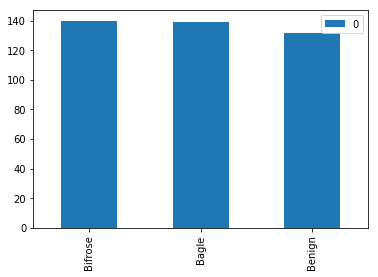

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

data = pd.read_csv(output_dir + 'small_graph_filenames.csv',
                   delimiter='/', names=['label', 'graph_id', 'filename'])
label_cnts = Counter(data['label'])
print("Sampled: ", label_cnts)
df = pd.DataFrame.from_dict(label_cnts, orient='index')
df.plot(kind='bar')